In [27]:
import soundfile # to read audio file
import numpy as np
import pandas as pd
import librosa # to extract speech features
import glob
import os
import pickle 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model, to_categorical

In [28]:
folder_with_predictions = "prediction-data"

# Model used to create predictions on emotions

In [29]:
model = keras.models.load_model("samuli_model")

## Model architecture

In [30]:
model.summary()

Model: "mlp_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 180, 1)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 180, 128)          768       
_________________________________________________________________
dropout (Dropout)            (None, 180, 128)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 22, 128)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 22, 128)           82048     
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 128)           0         
_________________________________________________________________
flatten (Flatten)            (None, 2816)              0 

## Data and training

Trained on RAVDESS and CREMA-D datasets. The emotions used to train the model and are possible predictions are: neutral, happy, angry, sad and fearful. 

![loss](model-loss.png "Title")


![accuracy](model-accuracy.png "Title")


#### Confusion matrix

Confusion matrix (rows: true classes; columns: predicted classes):

"[[ 56   2   0  15   1]

 [  7 112   4  10   6]
 
 [  1   4 130   5   0]
 
 [ 10   3   5 140  17]
 
 [  0   6   3  19 121]]"

Classification accuracy for each class on training data:

0 (neutral): 0.7567567567567568

1 (happy): 0.8057553956834532

2 (angry): 0.9285714285714286

3 (sad): 0.8

4 (fearful): 0.8120805369127517

# Plot emotions

In [31]:
import matplotlib.pyplot as plt
def get_metadata_from_filename(filename):
    split = filename.split("_")
    
    video_name = split[0]
    views = split[1]
    likes = split[2]
    dislikes = split[3]
    dislikes = dislikes.split(".")
    creator = split[4]
    creator = creator.split(".")[0]
    
    return {
        "views": likes,
        "likes": likes,
        "dislikes": dislikes,
        "creator": creator,
        "video_name": video_name
    }
    

IndexError: list index out of range

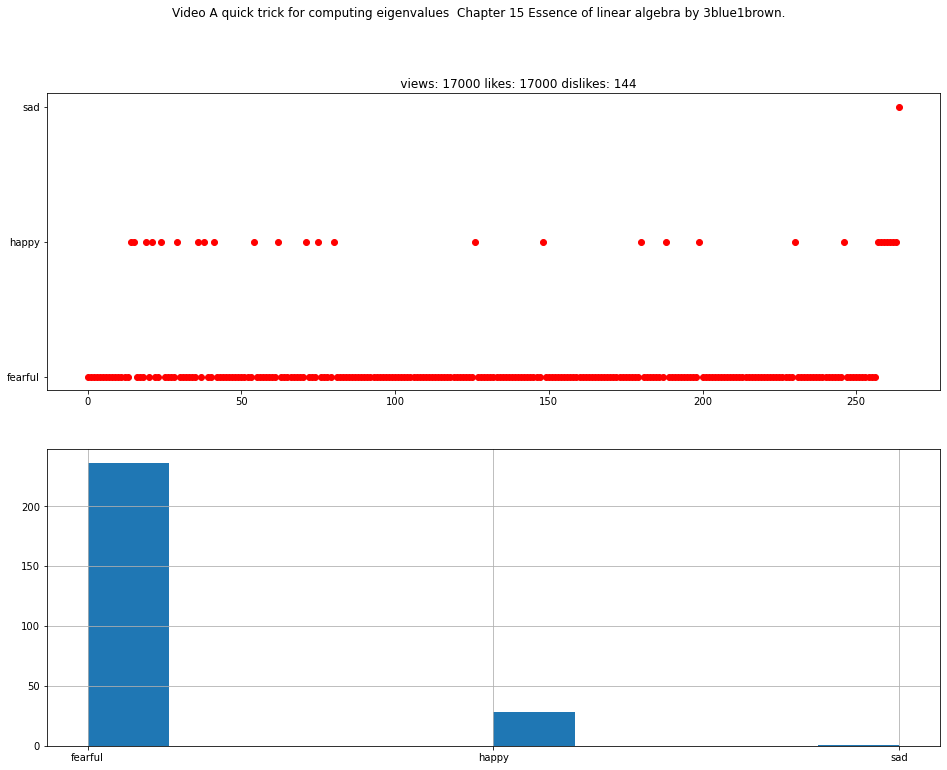

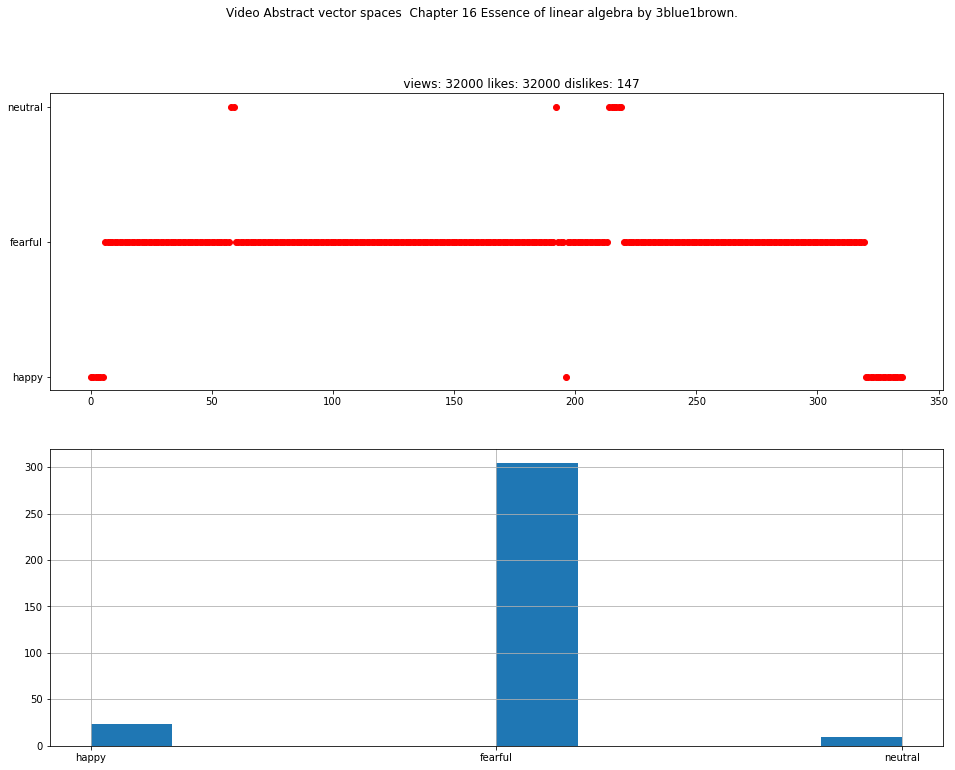

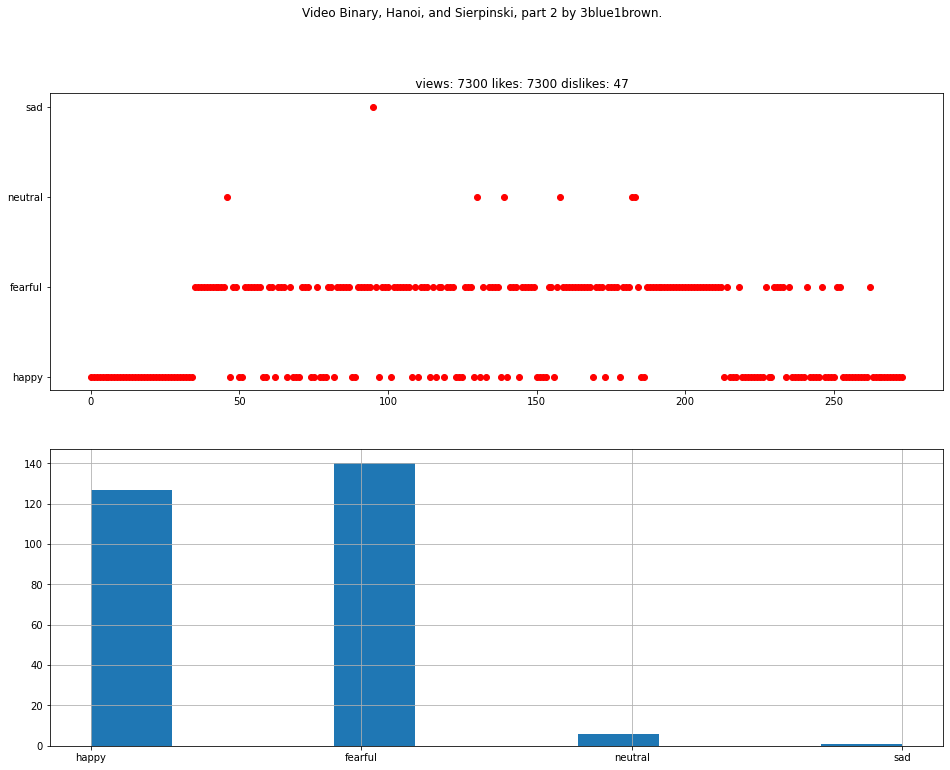

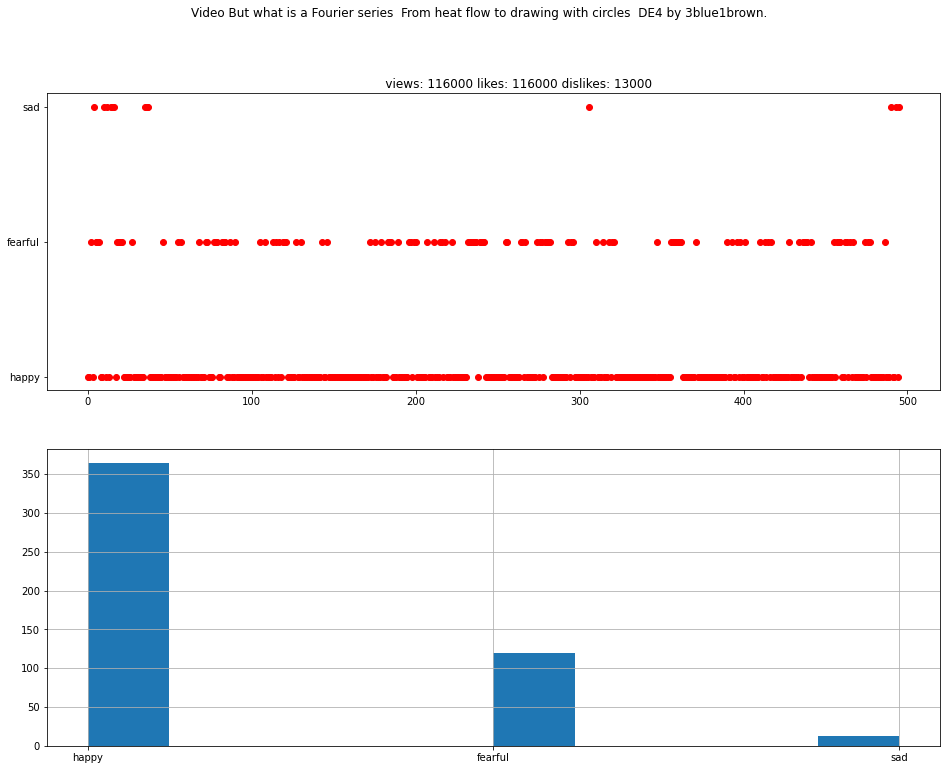

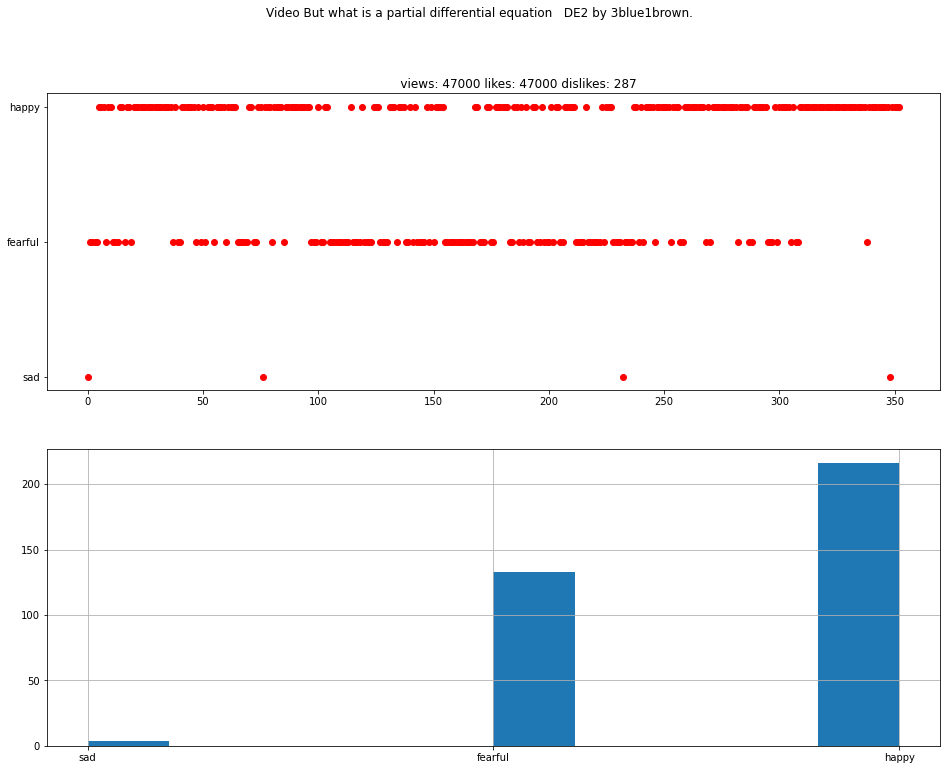

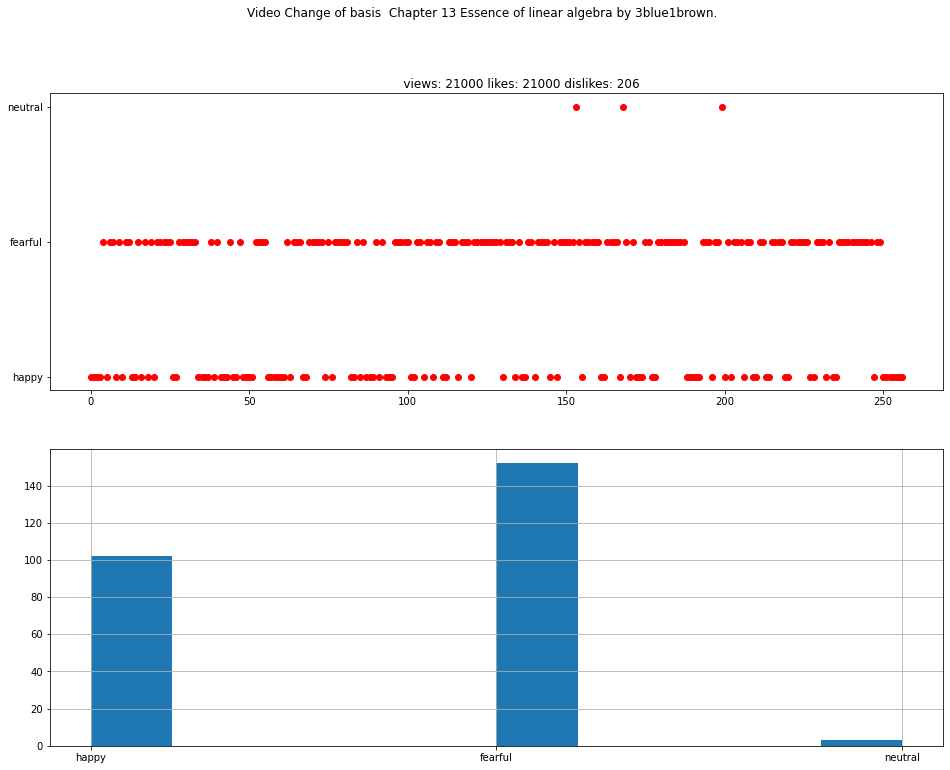

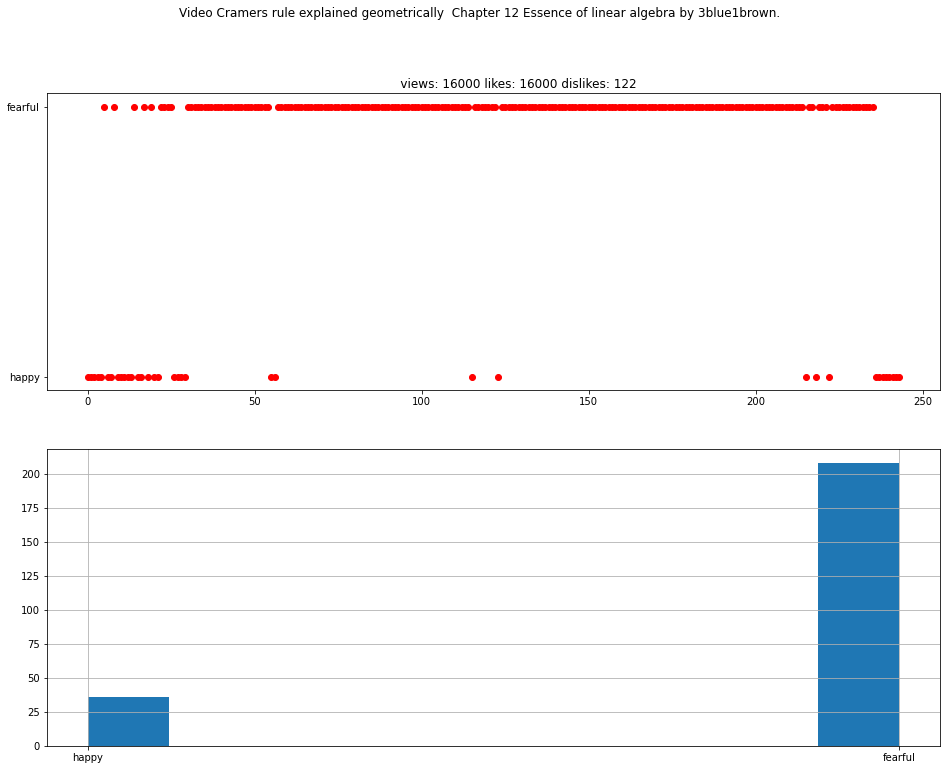

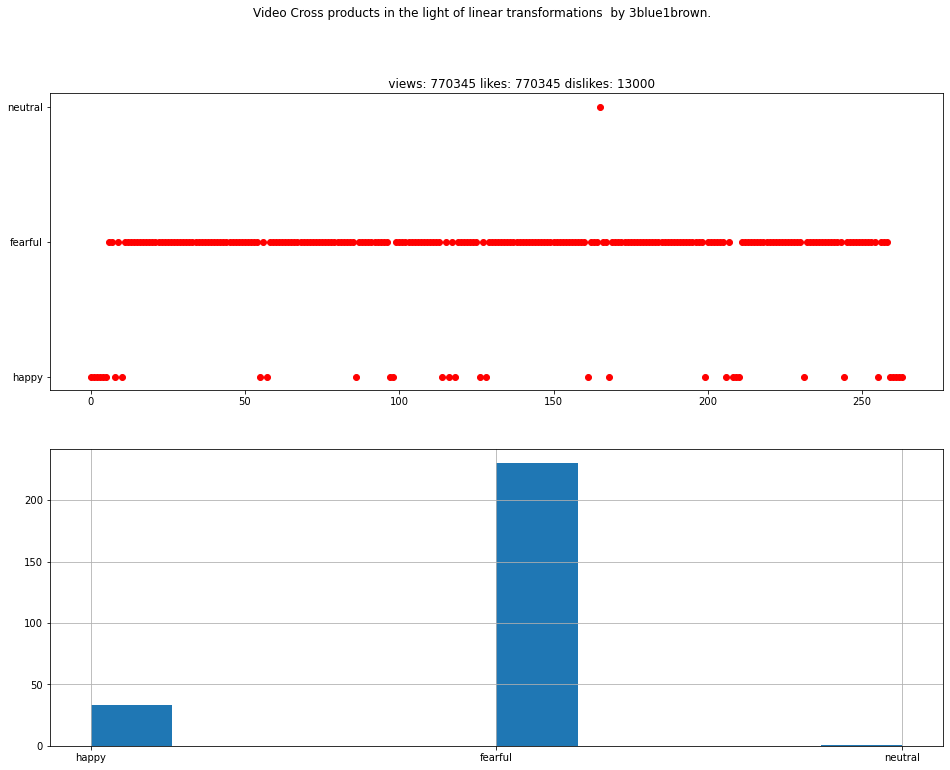

<Figure size 1152x864 with 0 Axes>

In [32]:
predictions_folder = os.getcwd() + f"\\{folder_with_predictions}"

meta_data_dict = {}

for root, subdirectories, files in os.walk(predictions_folder):
    
    for file in files:
        
        fig = plt.figure(figsize = (16,12))
        metadata = get_metadata_from_filename(file)
        vid_name = metadata["video_name"]
#        creator = metadata["creator"]
        views = metadata["views"]
        likes = metadata["likes"]
        dislikes = metadata["dislikes"]
        
        plt.subplot(2,1,1)
        
        plt.suptitle(f"Video {vid_name} by {creator}.")
        title_string = ""
        for key in ["views", "likes", "dislikes"]:
            key_value = metadata[key]
            title_string = "    " + title_string + f" {key}: {key_value}"
        plt.title(title_string)
        df_emotions = pd.read_csv(f"{predictions_folder}\\{file}")
        plt.plot(np.array(df_emotions['emotion']), 'ro')
        plt.subplot(2,1,2)
        df_emotions['emotion'].hist()